# Guide for twinpy/analysis/shear_analyzer.py

In [1]:
%aiida
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from pprint import pprint
import numpy as np
import twinpy
from twinpy.interfaces.aiida import AiidaShearWorkChain
from twinpy.analysis.shear_analyzer import ShearAnalyzer
from twinpy.plot.band_structure import (get_seekpath,
                                        get_labels_for_twin,
                                        get_band_paths_from_labels,
                                        get_labels_band_paths_from_seekpath,
                                        BandsPlot)

jupyter_dir = os.path.join(os.path.dirname(twinpy.__file__), '..', 'jupyter')
sys.path.append(os.path.join(jupyter_dir, 'site-packages'))
from jupyter_help import show_info

# shear_pk = 309999  # twinpy Mg_pv
shear_pk = 315857  # twinpy Ti_pv

# class ShearAnalyzer

In [3]:
aiida_shear = AiidaShearWorkChain(load_node(shear_pk))
analyzer = aiida_shear.get_shear_analyzer()
show_info(analyzer, is_class=True)

(array([[ 2.89915507,  0.        ,  0.        ],
       [-1.44957753,  2.51074194,  0.        ],
       [ 0.        ,  0.        ,  4.58832764]]), array([[0.33333333, 0.66666667, 0.25      ],
       [0.66666667, 0.33333333, 0.75      ]]), ['Ti', 'Ti'])
(array([[ 2.89915507,  0.        ,  0.        ],
       [-1.44957753,  2.51074194,  0.        ],
       [ 0.        ,  0.        ,  4.58832764]]), array([[0.33333333, 0.66666667, 0.25      ],
       [0.66666667, 0.33333333, 0.75      ]]), ['Ti', 'Ti'])
(array([[ 2.4857498 , -1.44957754,  0.        ],
       [ 2.4857498 ,  1.44957754,  0.        ],
       [-0.0074397 ,  0.        ,  4.63445943]]), array([[0.33333333, 0.33333333, 0.25      ],
       [0.66666667, 0.66666667, 0.75      ]]), ['Ti', 'Ti'])
(array([[ 2.4857498 , -1.44957754,  0.        ],
       [ 2.4857498 ,  1.44957754,  0.        ],
       [-0.0074397 ,  0.        ,  4.63445943]]), array([[0.33333333, 0.33333333, 0.25      ],
       [0.66666667, 0.66666667, 0.75      ]]), ['

## def set_phonon_analyzers

In [4]:
show_info(analyzer.set_phonon_analyzers)
print("NOTE:")
print("# If you get ShearAnalyzer class object from AiidaShearWorkChain,")
print("# self._phonon is automatically set.")

====== START method information ======

# ---------
# docstring
# ---------

        Set phonons.

        Args:
            phonons: List of Phonopy class object.
        

======= END method information =======


NOTE:
# If you get ShearAnalyzer class object from AiidaShearWorkChain,
# self._phonon is automatically set.


## def get_shear_diffs

In [5]:
show_info(analyzer.get_shear_diffs)
print("# keys")
print(list(analyzer.get_shear_diffs().keys()))
print("")
print("# data")
pprint(analyzer.get_shear_diffs())

====== START method information ======

# ---------
# docstring
# ---------

        Get structure diffs between original relax and sheared relax cells
        IN ORIGINAL FRAME.
        

======= END method information =======


# keys
['lattice_diffs', 'scaled_posi_diffs', 'cart_posi_diffs', 'cart_norm_diffs']

# data
{'cart_norm_diffs': array([[0.        , 0.        ],
       [0.01507648, 0.02189648],
       [0.02908556, 0.04448815],
       [0.04182063, 0.06788724],
       [0.05394692, 0.09174356],
       [0.06642476, 0.11552429],
       [0.08039197, 0.13863192],
       [0.09676803, 0.16070285],
       [0.11650405, 0.18153067],
       [0.14103565, 0.20099604]]),
 'cart_posi_diffs': array([[[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.01265511, 0.00730641, 0.00371008],
        [0.00908033, 0.00524255, 0.01922288]],

       [[0.02440305, 0.01408909, 0.0072082 ],
        [0.01906782, 0.01100883, 0.03865772]],

       [[0.03505303, 0.0

## def get_band_paths

In [6]:
show_info(analyzer.get_band_paths)
cell = analyzer.phonon_analyzers[0].primitive_cell
skp = get_seekpath(cell)
print("# You have to determine band paths for first cell.")
print("")
print("# twin labels")
pprint(get_labels_for_twin())
print("")
print("# seekpath output")
print("### path")
pprint(skp['path'])
print("")
print("### point coords")
pprint(skp['point_coords'])

# labels = ['GAMMA', 'M_2', 'L_2', 'A', '', 'GAMMA', 'K_2']
labels = ['GAMMA', 'M_1', 'L_1', 'A', '', 'GAMMA', 'K_1']
fixed_labels, band_paths = get_band_paths_from_labels(
                               labels=labels,
                               labels_qpoints=get_labels_for_twin())
print("")
print("Example:")
print("# labels")
print(labels)
print("")
print("# fixed labels")
print(fixed_labels)
print("")
print("# fixed labels, band_paths")
pprint(band_paths)

====== START method information ======

# ---------
# docstring
# ---------

        Get band paths for all shear cells from band paths for first cell.

        Args:
            base_band_paths (np.array): Path connections for first
                                             primitive standardized structure.

        Examples:
            >>> base_band_paths = [[[  0, 0, 0.5],
                                    [  0, 0, 0  ]],
                                   [[0.5, 0,   0],
                                    [0.5, 0, 0.5],
                                    [  0, 0, 0.5]]]

        Note:
            Get path_connections for each shear structure considering
            structure body rotation.
        

======= END method information =======


# You have to determine band paths for first cell.

# twin labels
{'A': [0, 0, 0.5],
 'GAMMA': [0, 0, 0],
 'H_1': [0.3333333333333333, 0.3333333333333333, 0.5],
 'H_2': [-0.3333333333333333, 0.6666666666666666, 0.5],
 'K_1': [0.3333333333

## def get_band_structures

====== START method information ======

# ---------
# docstring
# ---------

        Get BandStructure objects.

        Args:
            base_band_paths (np.array): Path connections for first
                                             primitive standardized structure.
            labels (list): Band labels for first band paths.
            npoints (int): The number of qpoints along the band path.
            with_eigenvectors (bool): If True, compute eigenvectors.

        Notes:
            Reciprocal lattices for each structure are set automatically.
            For more detail, see 'get_band_qpoints_and_path_connections'
            in phonopy.phonon.band_structure.
        

======= END method information =======




(<Figure size 576x432 with 2 Axes>,
  <matplotlib.axes._axes.Axes at 0x7f16c2cbbdd0>])

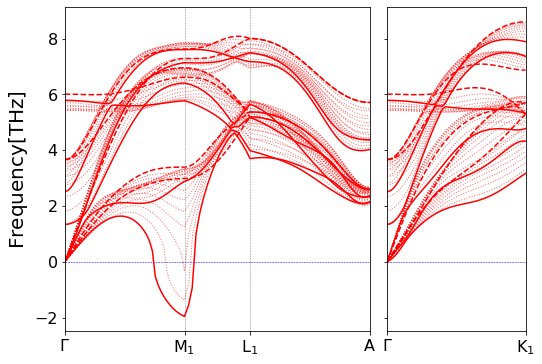

In [7]:
show_info(analyzer.get_band_structures)
band_structures = analyzer.get_band_structures(
    base_band_paths=band_paths,
    labels=fixed_labels,
    npoints=51,
    with_eigenvectors=False)
BandsPlot(band_structures).plot_band_structures()